In [52]:
import pandas as pd
import seaborn as sns
import numpy as np # linear algebra

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [54]:
df = pd.read_csv('Data Carrard et al. 2022 MedTeach.csv')

In [55]:
def create_groups(value):
    cleaned = [i.strip(" ") for i in value.split(";")]
    grouped_dict = dict()
    for i in cleaned:
        div = i.split("=")
        grouped_dict[int(div[0])] = div[1]
    return grouped_dict

In [56]:
maps = dict()
# columns = codebook.iloc[:, 0].values
ids = [2, 3, 4, 5, 6, 8, 9]

In [57]:
maps

{}

In [58]:
df.head(20)

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23
5,14,26,5,2,1,1,1,10,2,0,102,48,37,17,0.690476,14,56,18,15,18
6,17,23,5,2,1,1,0,15,3,0,117,58,38,23,0.714286,45,56,28,17,16
7,21,23,4,1,1,1,1,8,4,0,118,65,40,32,0.880952,6,36,11,10,27
8,23,23,4,2,1,1,1,20,2,0,118,69,46,23,0.666667,43,43,26,21,22
9,24,22,2,2,1,1,0,20,5,0,108,56,36,22,0.690476,11,43,18,6,23


In [59]:
df_classes = df.copy().iloc[:, ids]

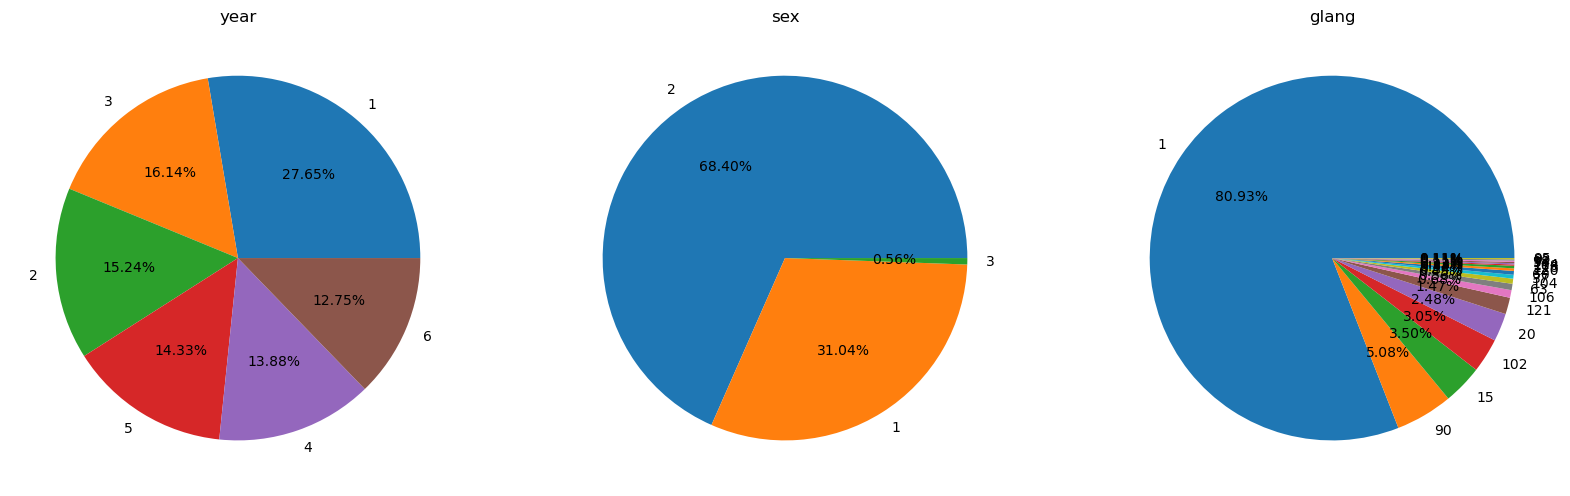

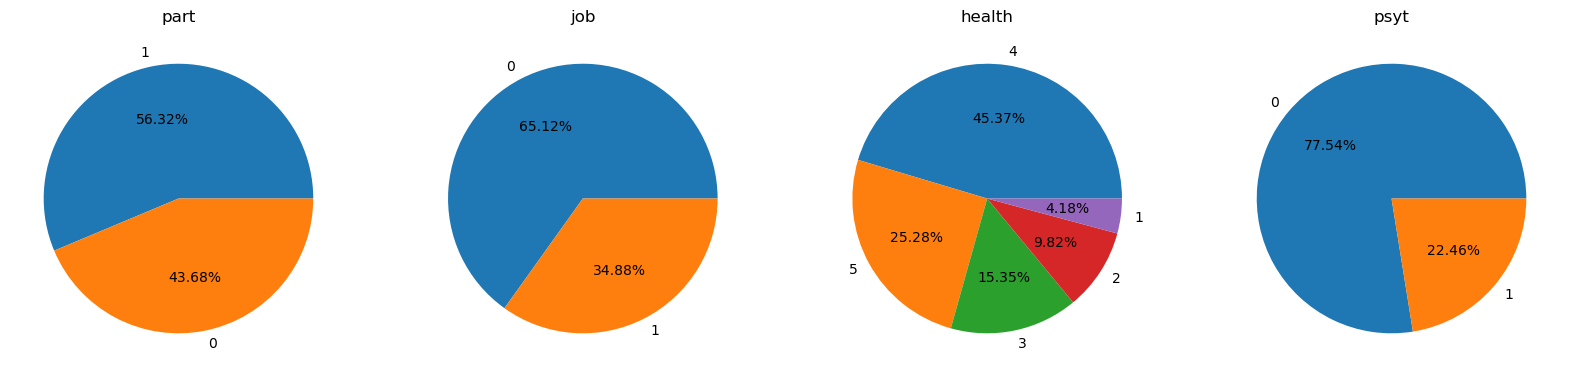

In [60]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20, 25))
cols = df_classes.columns
for i in range(0, 3):
    freqs = df_classes[cols[i]].value_counts()
    axes[i].pie(freqs, labels=freqs.index, autopct="%0.2f%%")
    axes[i].set_title(cols[i])
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(20, 25))
for i in range(3, df_classes.shape[1]):
    freqs = df_classes[cols[i]].value_counts()
    axes[i-3].pie(freqs, labels=freqs.index, autopct="%0.2f%%")
    axes[i-3].set_title(cols[i])

In [61]:
lang_freqs = df_classes['glang'].value_counts()
df_classes['glang'].unique()

array([120,   1,  90, 102,  15,  20, 106, 121, 118,  63, 108,  37, 104,
       114,  54,  60,  98,  92,  95], dtype=int64)

In [62]:
lang_freqs.unique()


array([717,  45,  31,  27,  22,  13,   6,   5,   4,   3,   2,   1],
      dtype=int64)

In [63]:
# numerical = [1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
# sns.pairplot(df, hue='psyt', vars=df.columns[numerical])

In [64]:
df.drop(['id' ,'job'] , axis=1 , inplace=True)

In [65]:
def model_evaluation(model, test_sample, truth, categorical=True):
    yhat = model.predict(test_sample)
    score = accuracy_score(yhat, truth)
    text = "Accuracy score for the model {}%".format(round(score*100, 2))
    if categorical:
        cm = confusion_matrix(yhat, truth)
        sns.heatmap(cm, annot=True)
        plt.title(text)
    else:
        dd = dict()
        for i in range(test_sample.shape[1]):
            name = "data:{}".format(i)
            dd[name] = test_sample[:, i]
#         dd['target'] = truth
        dd['predicted'] = yhat
        print(text)
        df = pd.DataFrame(dd)
#         fig, axes = plt.subplots(nrows=2, ncols=1)
        sns.pairplot(df, hue='predicted', vars=df.columns[:-1])
        plt.title(text)
        plt.show()

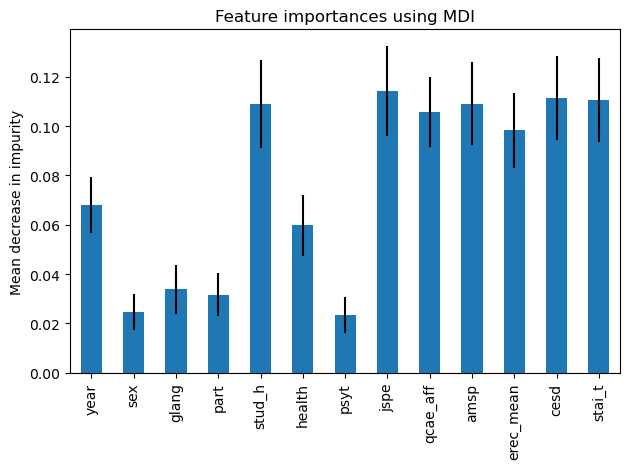

In [66]:
temp = [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14]
X = df.iloc[:, temp].values
y = df.iloc[:, 9].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
# ids[:-1]+numerical
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(forest.feature_importances_, index=df.columns[temp])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [67]:
df

,age,year,sex,glang,part,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,18,1,1,120,1,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,26,4,1,1,1,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,21,3,2,1,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,21,2,2,1,0,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,21,3,1,1,1,22,4,0,102,58,28,21,0.690476,14,46,22,14,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,21,2,1,1,1,45,3,0,106,63,39,28,0.619048,41,39,23,4,34
882,20,2,2,1,0,13,3,0,113,67,40,21,0.809524,26,41,17,5,24
883,19,1,1,1,0,50,5,0,100,50,31,24,0.547619,14,45,15,8,31
884,24,5,2,1,0,20,2,1,120,64,39,21,0.785714,33,58,22,15,19


In [68]:
df['mbi_ex'].unique()

array([17, 14, 24, 16, 22, 18, 28, 11, 26, 15, 19, 25, 21, 10, 30, 27, 20,
       13, 23, 12,  7,  5,  9, 29,  6,  8], dtype=int64)

In [69]:
df.drop(['psyt'] , axis=1).to_csv('Input.csv' , index = False)
df['psyt'].to_csv('Output.csv' , index = False)

In [70]:
temp = [0, 1 , 2, 3, 4, 5, 6, 8 , 9 , 10, 11, 12, 13, 14,15,16,17]
x = df.iloc[:, temp].values
y = df.loc[:, 'psyt'].values
oversample = SMOTE()
x_all, y_all = oversample.fit_resample(x, y)

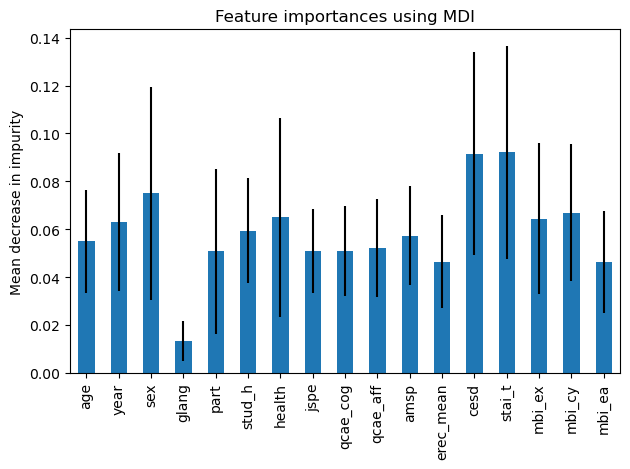

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, random_state=42, test_size=0.2)
# ids[:-1]+numerical
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(forest.feature_importances_, index=df.columns[temp])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [72]:
temp_os = np.hstack((x_all, y_all.reshape(-1, 1)))
df_os = pd.DataFrame(temp_os, columns=df.columns[temp+[9]])

In [73]:
temp.pop(3)
temp.pop(3)
x, y = df.iloc[:, temp].values, df.loc[:, 'psyt'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

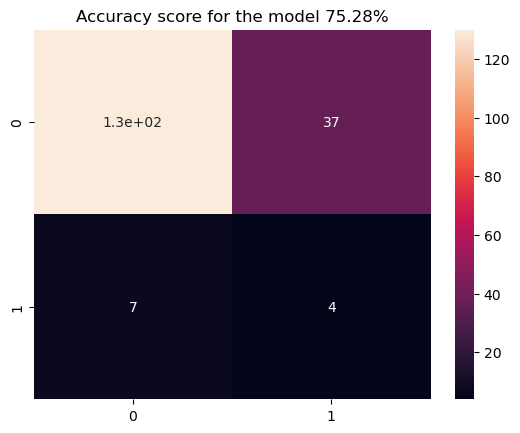

In [74]:
rfc = RandomForestClassifier(max_depth=20, max_features='sqrt')
rfc.fit(x_train, y_train)
model_evaluation(rfc, x_test, y_test)


In [75]:

# import pickle5
# filename = "my_model.pkl"

# pickle5.dump(rfc, open(filename, "wb"))

In [76]:
y_pred = rfc.predict(x_test)
print(rfc.predict(x_test))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [78]:
accuracy_score(y_test , y_pred)

0.7528089887640449

In [82]:
df

,age,year,sex,glang,part,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,18,1,1,120,1,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,26,4,1,1,1,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,21,3,2,1,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,21,2,2,1,0,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,21,3,1,1,1,22,4,0,102,58,28,21,0.690476,14,46,22,14,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,21,2,1,1,1,45,3,0,106,63,39,28,0.619048,41,39,23,4,34
882,20,2,2,1,0,13,3,0,113,67,40,21,0.809524,26,41,17,5,24
883,19,1,1,1,0,50,5,0,100,50,31,24,0.547619,14,45,15,8,31
884,24,5,2,1,0,20,2,1,120,64,39,21,0.785714,33,58,22,15,19


In [84]:
X_test

array([[24.,  5.,  1., ..., 15., 11., 24.],
       [19.,  2.,  2., ..., 23., 17., 24.],
       [24.,  5.,  2., ..., 13.,  9., 26.],
       ...,
       [24.,  6.,  1., ...,  7., 11., 25.],
       [21.,  1.,  2., ..., 20.,  8., 17.],
       [24.,  6.,  2., ..., 22., 16., 21.]])

In [85]:
xt =[[26 , 5 , 0, 120 , 55 , 3  , 50 , 40 , 21 , 0.8 , 35 , 65 , 25 , 14 , 20]]
y_pred = rfc.predict(xt)